In [1]:
import numpy as np

In [4]:
X = np.array([1, 2, 3])

print(X)

[[1 2 3]]


In [5]:
B = np.array([10])
print(B)

[10]


In [8]:
print(X + B)

[[11 12 13]]


In [9]:
print(np.array([1, 2, 3]) + np.array([10, 10, 10])) #print(X + B)

[11 12 13]


## 회귀문제의 역전파 구현

### 출력층

In [10]:
class OutputLayer:
    # 생성자
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        # wb_width = 0.01 가중치와 편향 설정을 위한 정규분포의 표준편차
    
    # 순전파 기능
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u # 항등함수
    
    # 역전파 기능
    def backward(self, t):
        delta = self.y - t #델타 정의
        self.grad_w = np.dot(self.x.T, delta)#가중치에 대한 기울기
        self.grad_b = np.sum(delta, axis=0) #bias에 대한 기울기
        
        #이전 layer에서 들어온 출력에 대한 기울기
        self.grad_x = np.dot(delta, self.w.T)
    
    # update: 역전파를 통해서 가중치값을 갱신해줘야 함
    # 경사하강법의 가중치와 bias를 수정하는 방법
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        

### 은닉층

In [11]:
class MiddleLayer:
    # 생성자
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
    
    # 순전파
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u)) # Sigmoid 함수
    
    # 역전파
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y # Sigmoid 미분
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

### Main 코드

In [12]:
import matplotlib.pyplot as plt

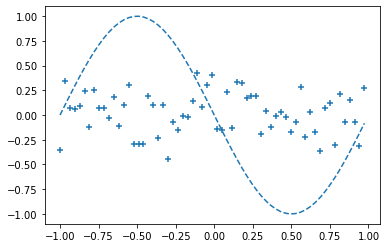

Epoch:0/2001 Error:0.27149409630819893


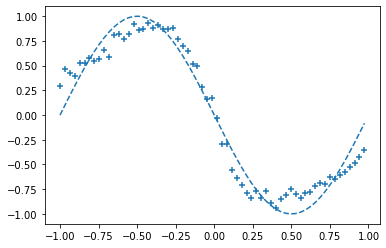

Epoch:200/2001 Error:0.010603269630931118


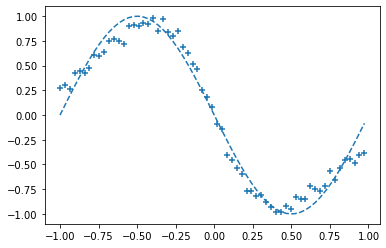

Epoch:400/2001 Error:0.006874971395267847


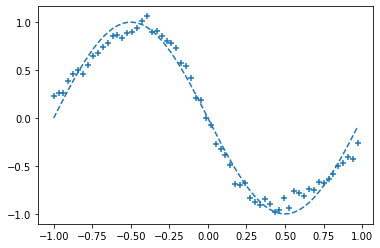

Epoch:600/2001 Error:0.005139531546637622


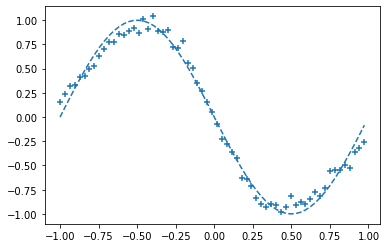

Epoch:800/2001 Error:0.003641245376605004


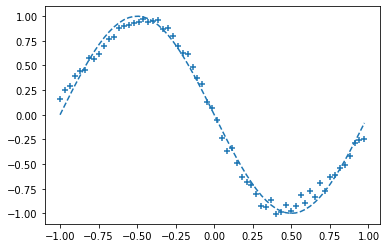

Epoch:1000/2001 Error:0.002871262576918511


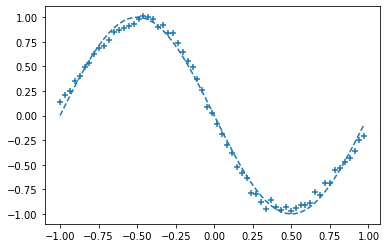

Epoch:1200/2001 Error:0.0017022737334166378


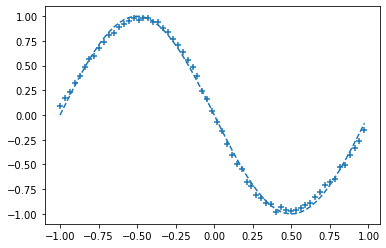

Epoch:1400/2001 Error:0.0008130832069454374


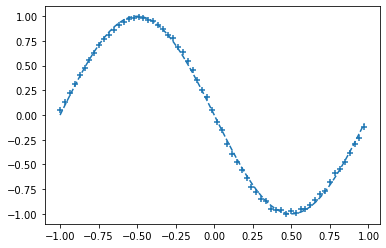

Epoch:1600/2001 Error:0.0002974720518345804


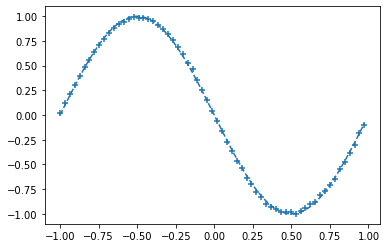

Epoch:1800/2001 Error:9.882970571283834e-05


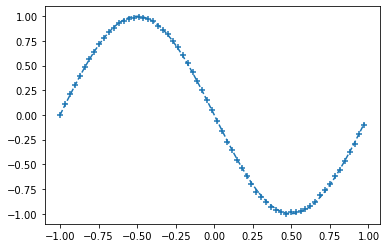

Epoch:2000/2001 Error:5.362720021729926e-05


In [14]:
# input 데이터 정의
input_data = np.arange(0, np.pi*2, 0.1) # 0부터 2pi까지 0.1씩
# 정답
correct_data = np.sin(input_data)
# input 데이터 수정
input_data = (input_data - np.pi) / np.pi # 입력을 -1.0 ~ 1.0으로 만들어줌
# number data 데이터의 개수
n_data = len(correct_data)

# 초기값 설정
n_in = 1 # 입력층의 뉴런 수
n_mid = 3 # 은닉층의 뉴런 수
n_out = 1 # 출력층의 뉴런 수

wb_width = 0.01
eta = 0.1 # 학습률 learning rate
epoch = 2001
interval = 200 # epoch 200번 마다 어떻게 진행되고 있는지 찍어보기 위해

# 각 층의 초기화
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# 학습
for i in range(epoch): # 2001번 돌아감
    
    index_random = np.arange(n_data) #0부터 데이터의 개수 전까지를 인덱스로 잡아줌
    np.random.shuffle(index_random) #Numpy의 셔플기능을 이용해 인덱서 섞어줌
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random: # 섞은 인덱스에서 하나씩 뽑아줌
        x = input_data[idx:idx+1]
        t = correct_data[idx:idx+1]
        
        # 순전파
        middle_layer.forward(x.reshape(1,1)) #입력이 한개이지만 행렬을 만들기 위해 reshape
        output_layer.forward(middle_layer.y) # middle_layer에서 나온 출력값
        
        # 역전파
        output_layer.backward(t.reshape(1,1)) # 위와 같이 행렬 변환
        middle_layer.backward(output_layer.grad_x)
        
        # 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        # 중간상황 확인을 위해
        if i % interval == 0:
            y = output_layer.y.reshape(-1)
            
            # 오차 계산
            total_error += 1.0 / 2.0 * np.sum(np.square(y - t))
            
            plot_x.append(x)
            plot_y.append(y)
            
            
      # graph 그리기
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
        
        print("Epoch:"+str(i)+'/'+str(epoch), \
             "Error:"+str(total_error/n_data))
        

#### 문제마다 패턴이 다르기 때문에 층마다의 뉴런 수나 변수값들을 시뮬레이션으로 넣어봐서 최적화된 수치를 직접 찾아야 한다.
- 은닉층의 뉴런수를 1, 2, 3, 4, 5 차례로 증가시키며 결과를 확인
- 3 또는 4개의 뉴런 이후에는 결과가 더 좋아지지 않고 계산량만 증가
- 은닉층에서 필요 이상의 뉴런 수는 과적합(Overfitting)을 일으킴

## 분류 문제의 역전파